In [1]:
from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,default,get_pyramid_dataset,lanczos,False,5,True,True


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


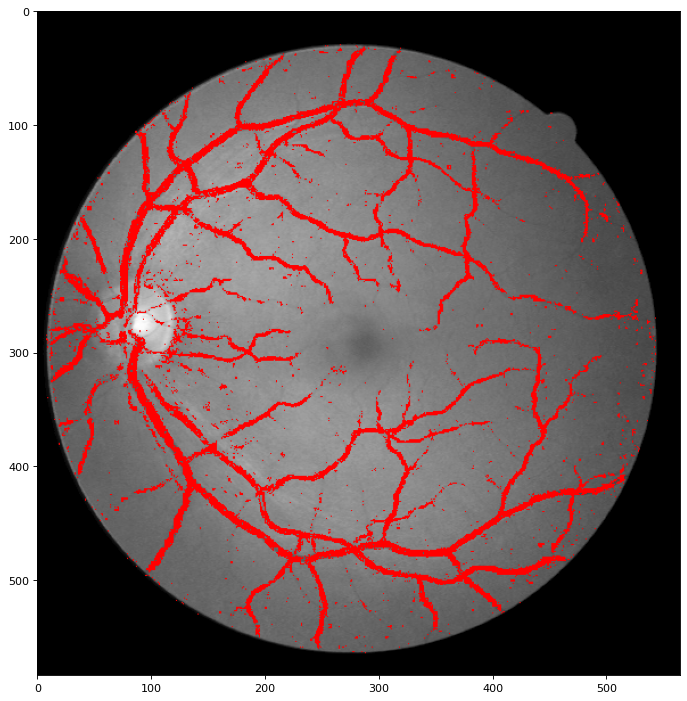

Accuracy score: 0.9250572573561301

F1 score: 0.6960701159174443

Confusion matrix:

     t/p      0     1 
        0 1143637 43908 
        1 58217 116945 
Sensivity: 0.6676390998047522
Specificity: 0.9630262432160466


(0.925, 0.696, 1143637, 43908, 58217, 116945)

In [3]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=True, plot_once=True)

## Reducción del ruido y discontinuidades

Dado que el proceso de clasificación se realiza para cada píxel de manera individual, en el resultado de gráfico de la clasificación no se observa una continuidad en los vasos sanguíneos. Dado que los vasos sanguíneos no se constituyen por medio de píxeles aislados e independientes, sino que se tratan de formas que presentan una continuidad con respecto a sus píxeles vecinos, la introducción de información relativa a estos en el proceso de entrenamiento del clasificador favorece la obtención de la continuidad deseada.

Para ello se realiza un proceso con dos iteraciones, donde la primera iteración se trata del proceso ya definido, en el que cada píxel se analiza de manera estrictamente individual, se obtiene una primera estimación, y una segunda iteración en la que dicha estimación es utilizada en forma de nuevas características para el entrenamiento de un segundo clasificador que proporciona finalmente el resultado final.

El resultado de la primera clasificación, basado en probabilidades, es reconstruido en forma de imagen con valores entre 0-100.

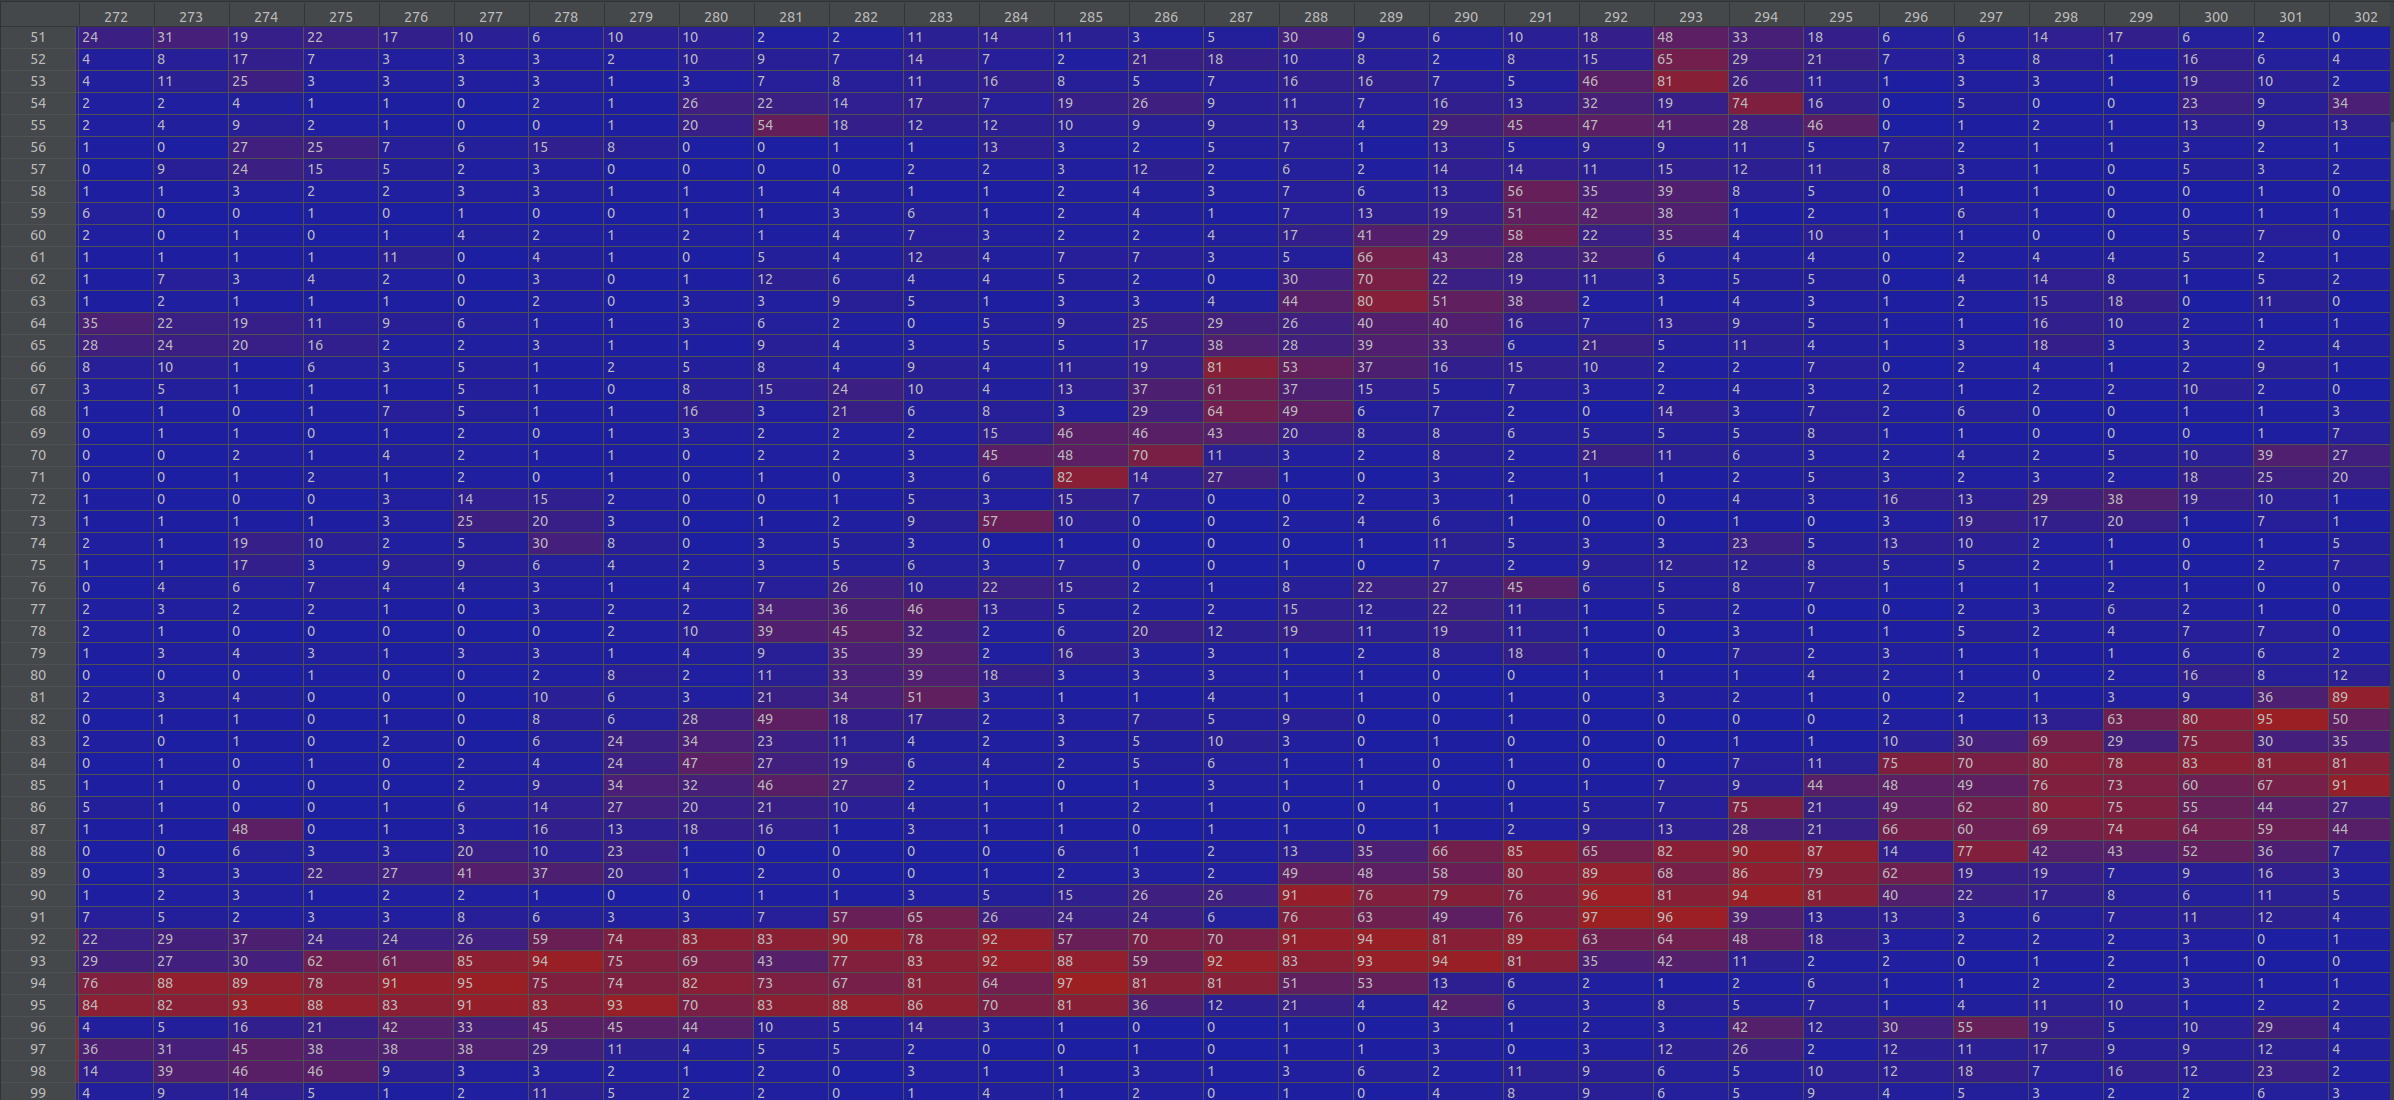

Mediante una convolución que realice la suma de valores próximos se puede obtener una estimación de la posibilidad global de su vencidad en pertenecer a un vaso sanguíneo.

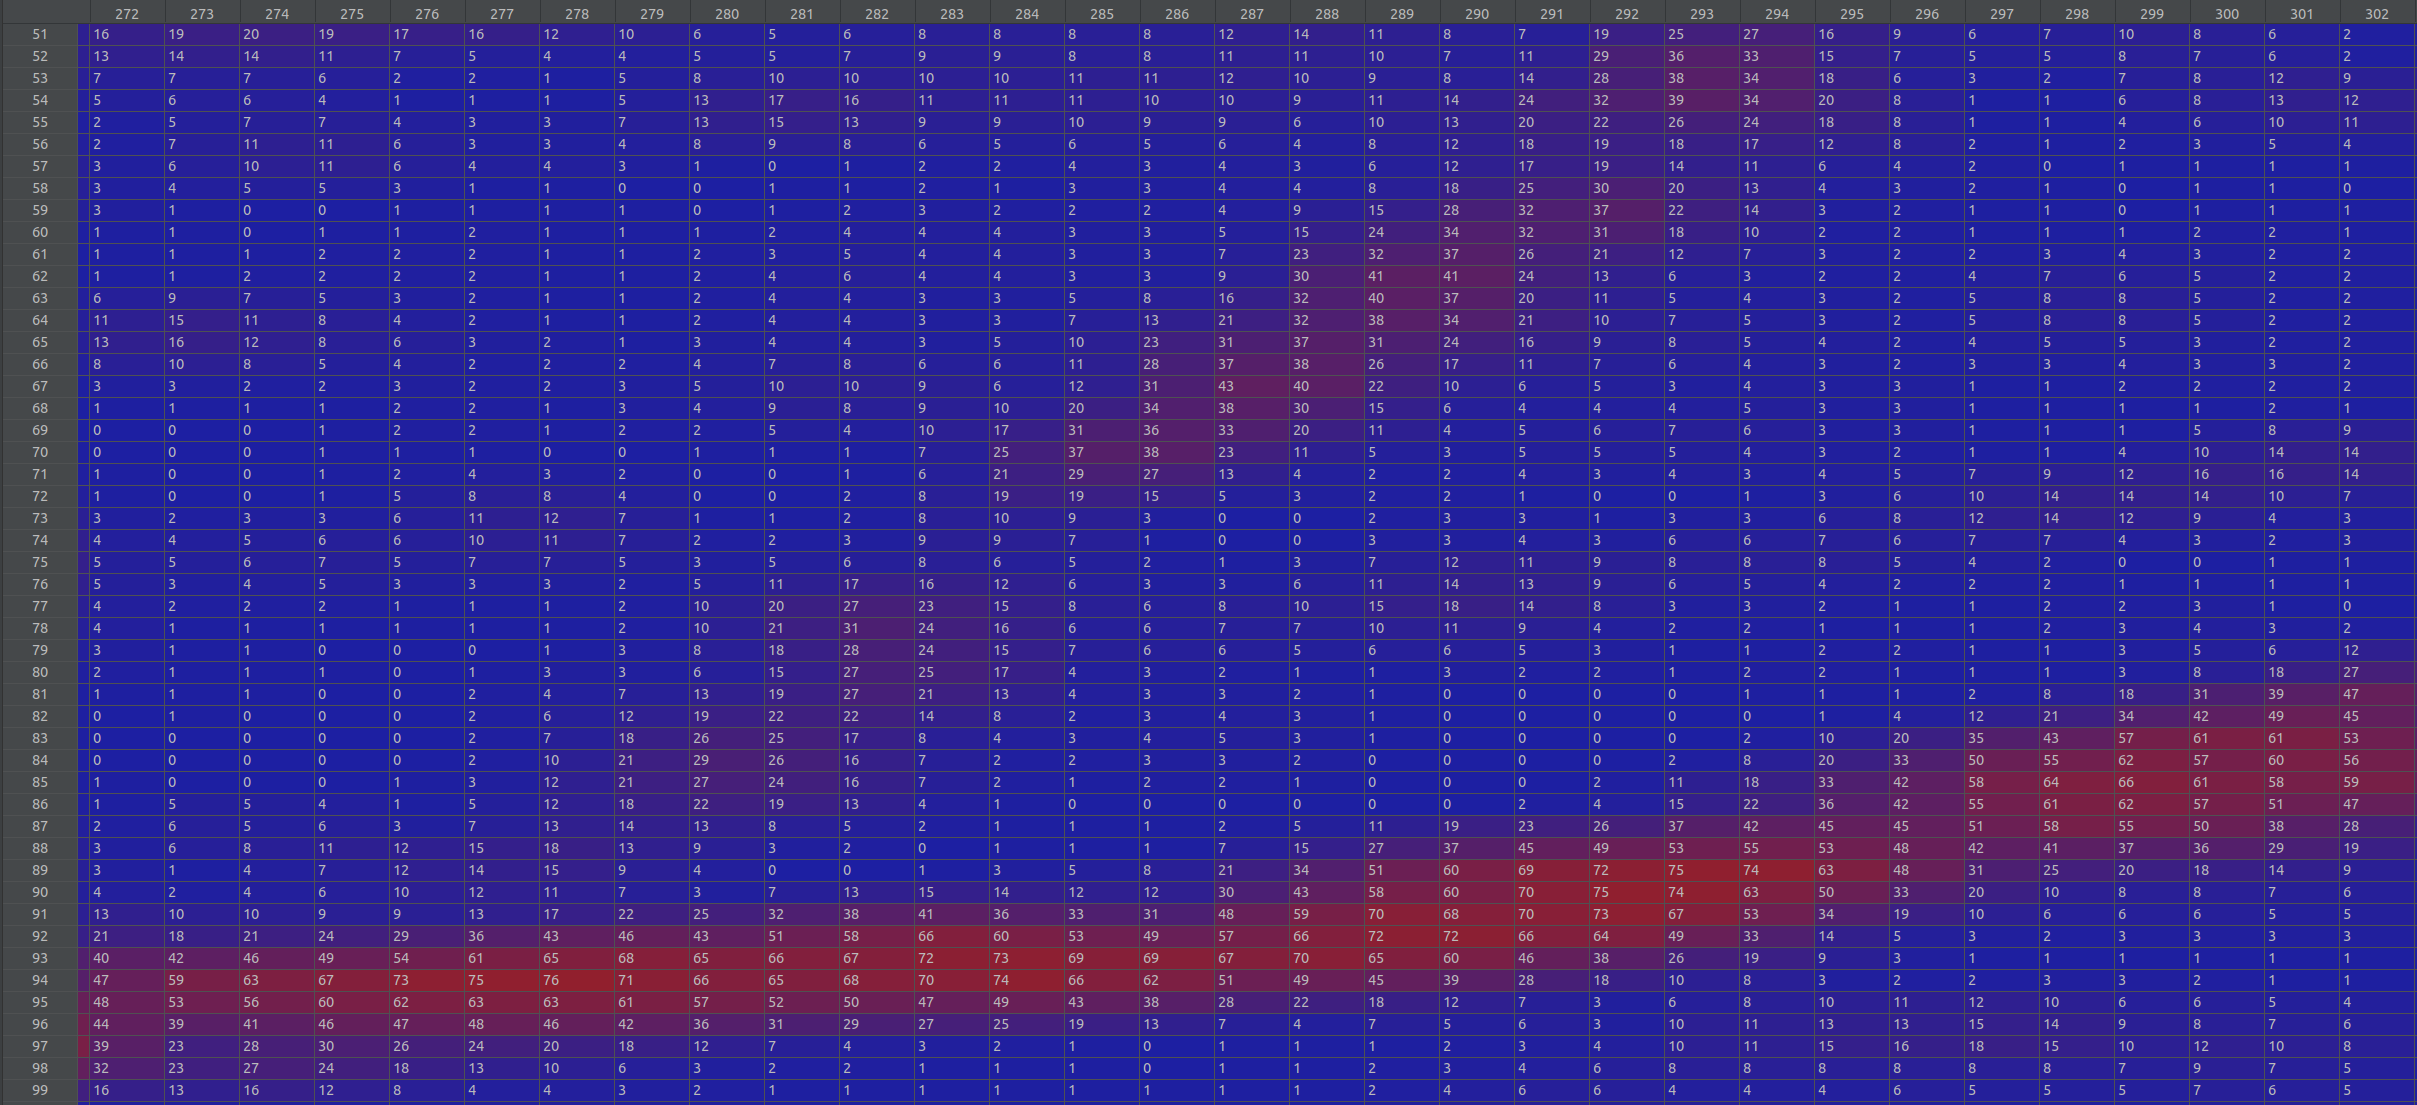

Dicha convolución se realiza con 3 núcleos de dimensiones 3x3, 5x5 y 10x10, conformando 3 nuevas características que son añadidas a la base de datos.

Así mismo, en el segundo clasificador se incluyen 4 características adicionales resultantes de aplicar el operador LBP (en su variante original) con radios 1, 2, 3 y 4, con la finalidad de considerar los elementos presentes en las proximidades de cada píxel de manera variante a la rotación.

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


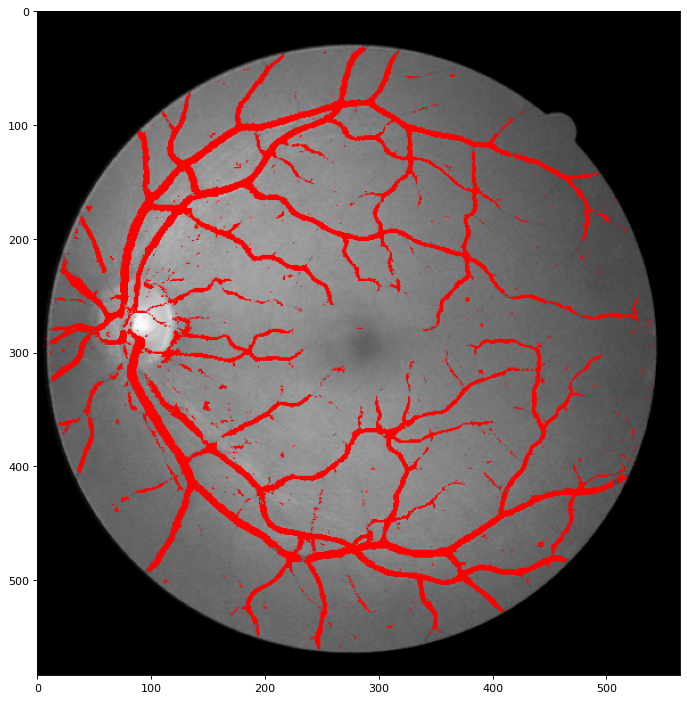

Accuracy score: 0.9379411715064206

F1 score: 0.7537605040793388

Confusion matrix:

     t/p      0     1 
        0 1148704 38841 
        1 45727 129435 
Sensivity: 0.7389445199301218
Specificity: 0.9672930288957471


(0.938, 0.754, 1148704, 38841, 45727, 129435)

In [4]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=True, plot_once=True, recurrence=True)